* **Mohamed Hamdy**
* **20106005**


In [ ]:
!pip install -qq ultralytics
import os
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab import drive


SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.3/901.3 kB 18.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [ ]:
drive.mount('/content/drive')

DATASET_PATH = '/content/drive/MyDrive/yolodataset/rock-paper-scissors.v14i.yolov11.zip'
!cp $DATASET_PATH .


Mounted at /content/drive


In [ ]:
# Unzip the dataset
!unzip -qq rock-paper-scissors.v14i.yolov11.zip -d rock_paper_scissors

In [ ]:

with open('rock_paper_scissors/data.yaml', 'r') as file:
    data_yaml = file.read()


data_yaml = data_yaml.replace('../train/images', '/content/rock_paper_scissors/train/images')
data_yaml = data_yaml.replace('../valid/images', '/content/rock_paper_scissors/valid/images')
data_yaml = data_yaml.replace('../test/images', '/content/rock_paper_scissors/test/images')


with open('data.yaml', 'w') as file:
    file.write(data_yaml)


In [ ]:
# Load YOLOv11 pretrained model
model = YOLO('yolo11m.pt')  # Pre-trained weights

# Train the model
results = model.train(
    data='data.yaml',
    epochs=10,
    imgsz=640,
    device=device,
    seed=SEED,
    augment=False           # Disable YOLO augmentations (since dataset is pre-augmented)
)


100%|██████████| 38.8M/38.8M [00:00<00:00, 88.3MB/s]


Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

100%|██████████| 755k/755k [00:00<00:00, 24.9MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 91.6MB/s]


AMP: checks passed ✅


train: Scanning /content/rock_paper_scissors/train/labels... 6455 images, 2516 backgrounds, 0 corrupt: 100%|██████████| 6455/6455 [00:03<00:00, 1868.61it/s]


train: New cache created: /content/rock_paper_scissors/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/rock_paper_scissors/valid/labels... 576 images, 238 backgrounds, 0 corrupt: 100%|██████████| 576/576 [00:00<00:00, 1248.65it/s]

val: New cache created: /content/rock_paper_scissors/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      8.77G      1.591      2.778      1.854          4        640: 100%|██████████| 404/404 [04:10<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.62it/s]

                   all        576        400          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      8.69G      1.742      2.466      1.981          9        640: 100%|██████████| 404/404 [03:59<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:08<00:00,  2.22it/s]

                   all        576        400      0.336      0.372      0.285      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      8.74G      1.625      2.228      1.835          6        640: 100%|██████████| 404/404 [03:55<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:08<00:00,  2.06it/s]

                   all        576        400      0.422      0.434      0.401      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      8.71G      1.483      1.932      1.727          1        640: 100%|██████████| 404/404 [03:53<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:08<00:00,  2.07it/s]

                   all        576        400       0.53      0.513       0.53      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10       8.7G      1.346      1.629      1.581          3        640: 100%|██████████| 404/404 [03:53<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:08<00:00,  2.24it/s]

                   all        576        400      0.589      0.621       0.65      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      8.71G      1.245      1.403        1.5          5        640: 100%|██████████| 404/404 [03:53<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:08<00:00,  2.07it/s]

                   all        576        400      0.713       0.61      0.723      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      8.71G      1.151      1.208      1.424          4        640: 100%|██████████| 404/404 [03:53<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:08<00:00,  2.24it/s]

                   all        576        400      0.789      0.746      0.815      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      8.71G      1.093      1.066      1.367          6        640: 100%|██████████| 404/404 [03:53<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:08<00:00,  2.01it/s]

                   all        576        400      0.834      0.773      0.856      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      8.71G      1.023     0.9724       1.31          6        640: 100%|██████████| 404/404 [03:53<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:08<00:00,  2.13it/s]

                   all        576        400      0.852      0.769      0.861      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      8.71G     0.9528     0.8322      1.257          5        640: 100%|██████████| 404/404 [03:53<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.26it/s]

                   all        576        400      0.855      0.835      0.896      0.678



10 epochs completed in 0.689 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.95it/s]


                   all        576        400      0.855      0.836      0.896      0.677
                 Paper        132        139       0.81      0.813       0.88      0.624
                  Rock        121        141      0.875      0.846      0.904      0.691
              Scissors        116        120      0.879      0.848      0.904      0.715
Speed: 0.2ms preprocess, 11.0ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train


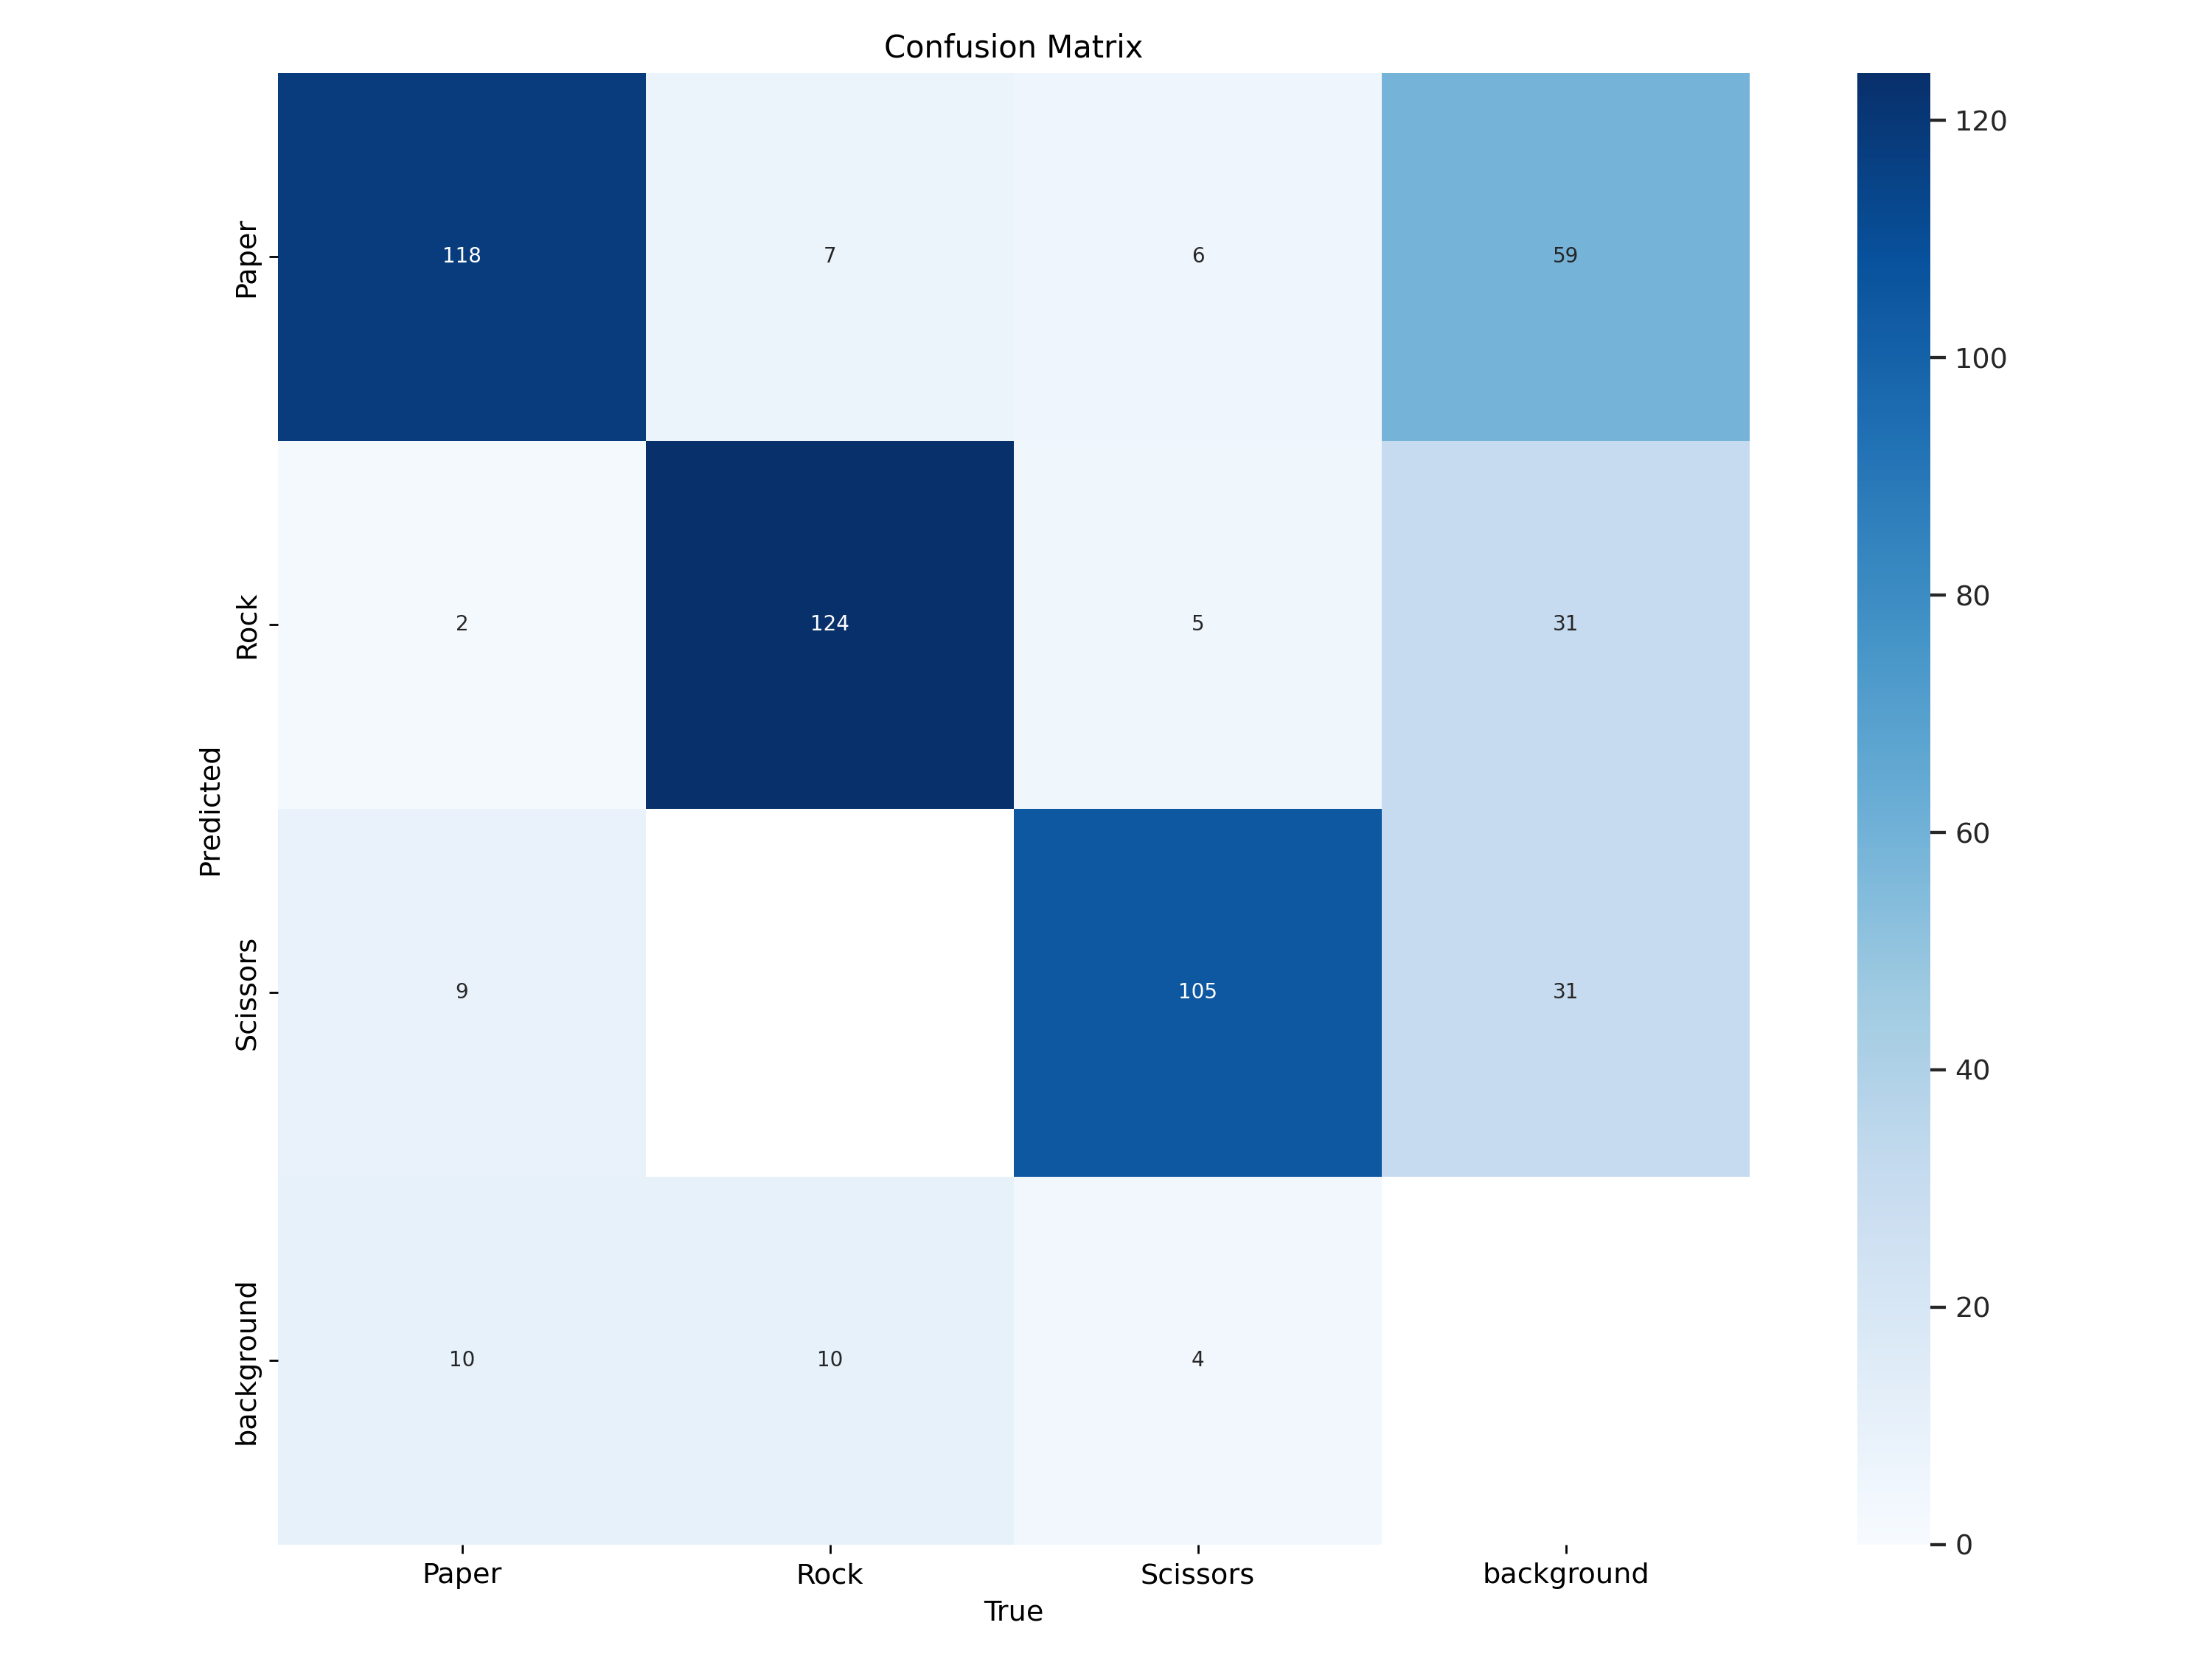

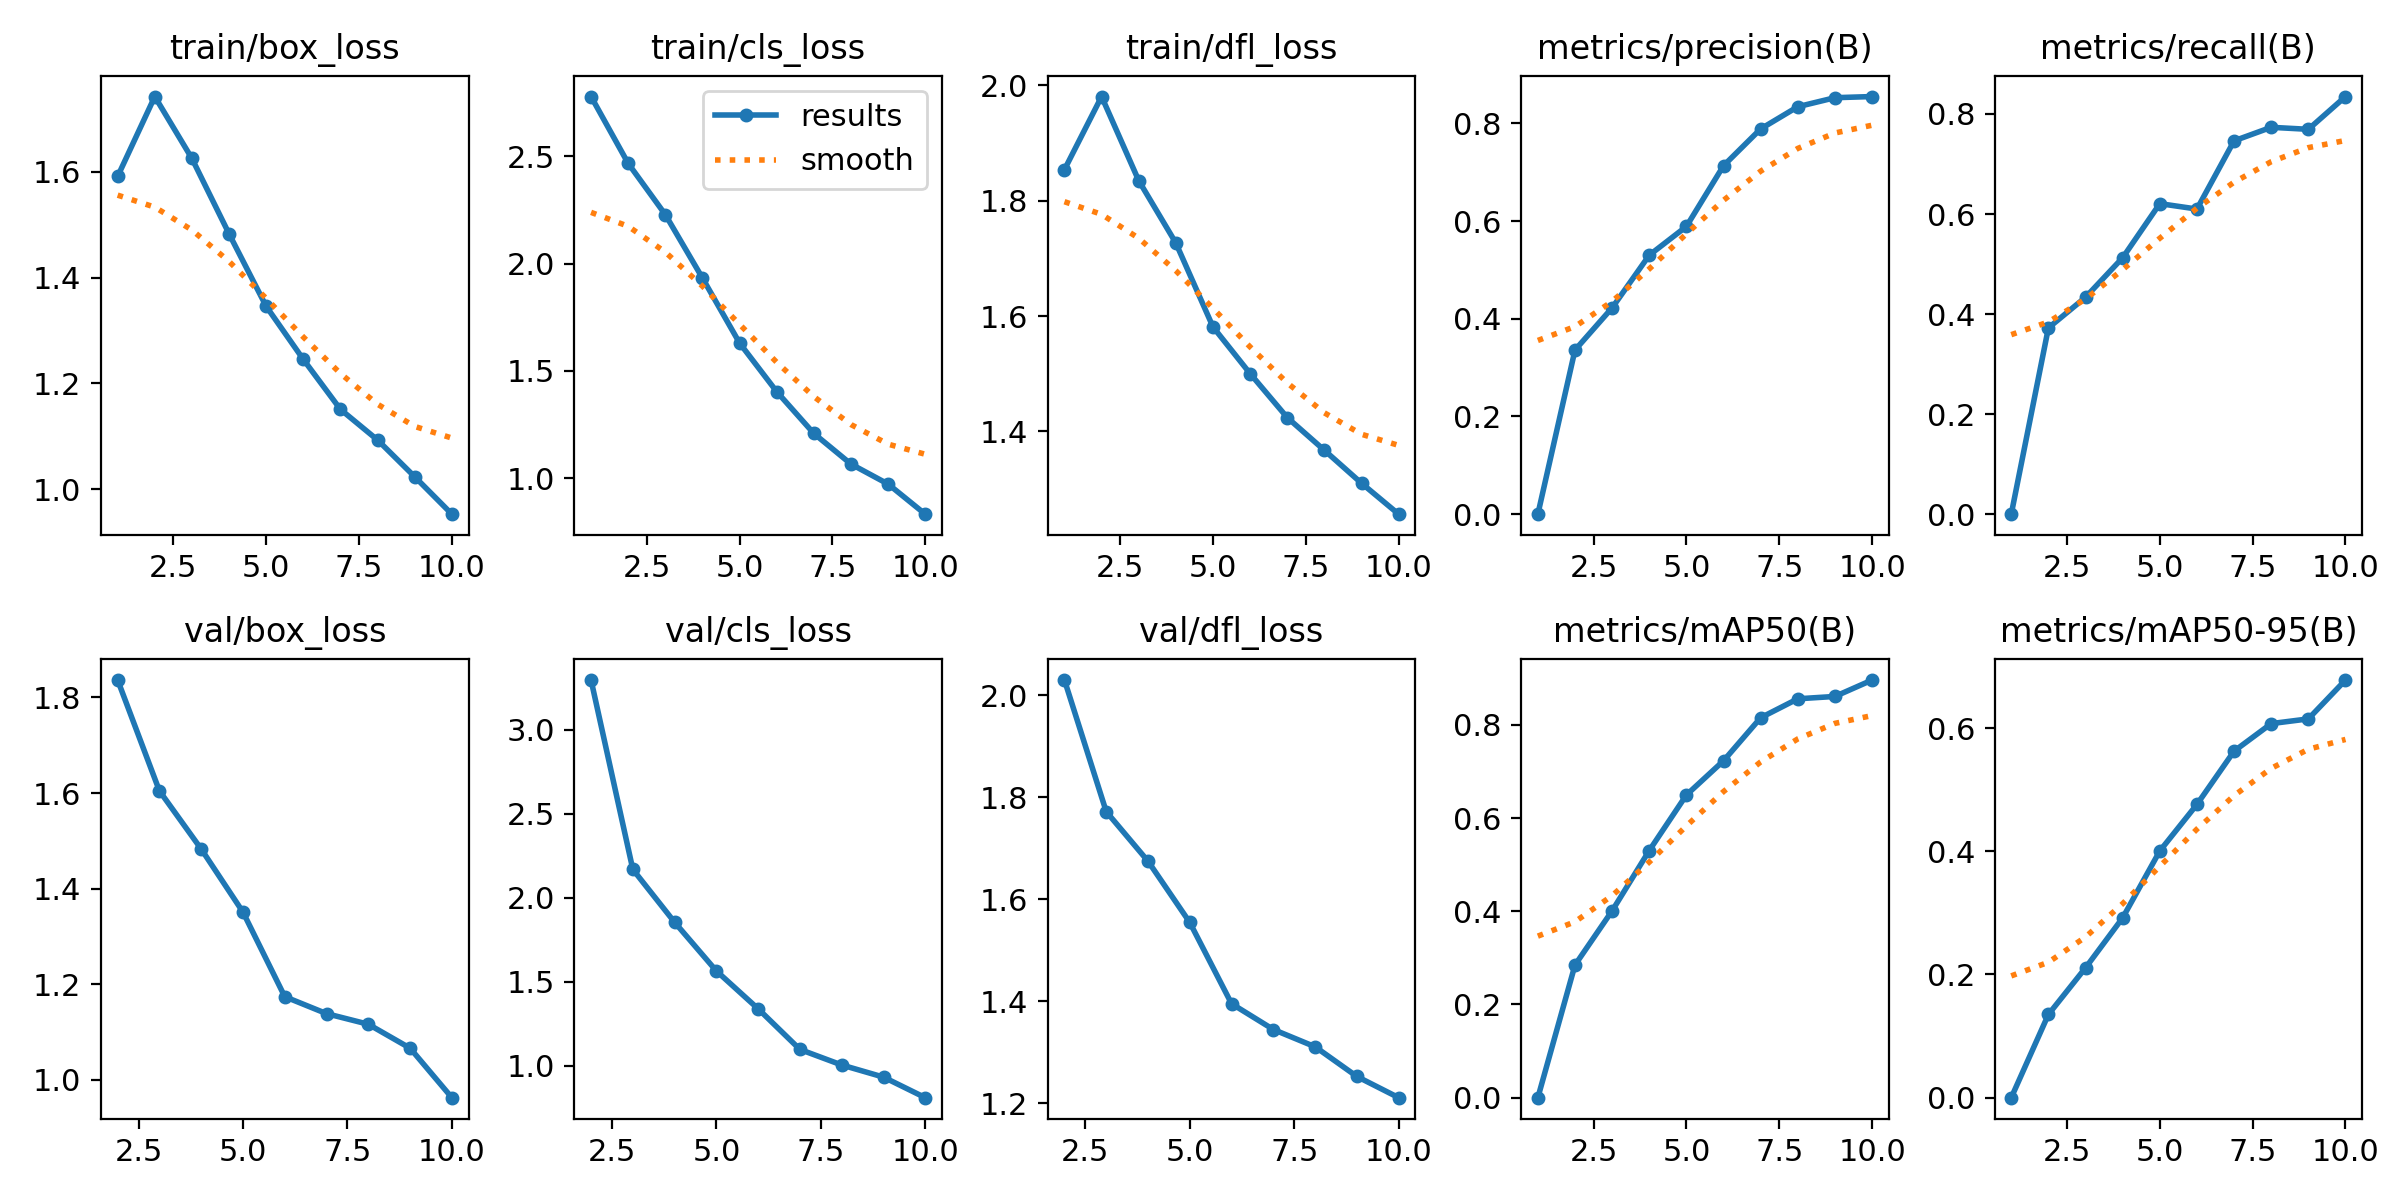

In [ ]:
from IPython.display import Image, display


conf_matrix_path = 'runs/detect/train/confusion_matrix.png'
display(Image(filename=conf_matrix_path))


loss_curve_path = 'runs/detect/train/results.png'
display(Image(filename=loss_curve_path))


image 1/1 /content/rock_paper_scissors/test/images/egohands-public-1624053426194_png_jpg.rf.dedd446bdb62335d1dc58b8ba18ecfa6.jpg: 640x640 1 Scissors, 27.5ms
Speed: 3.2ms preprocess, 27.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


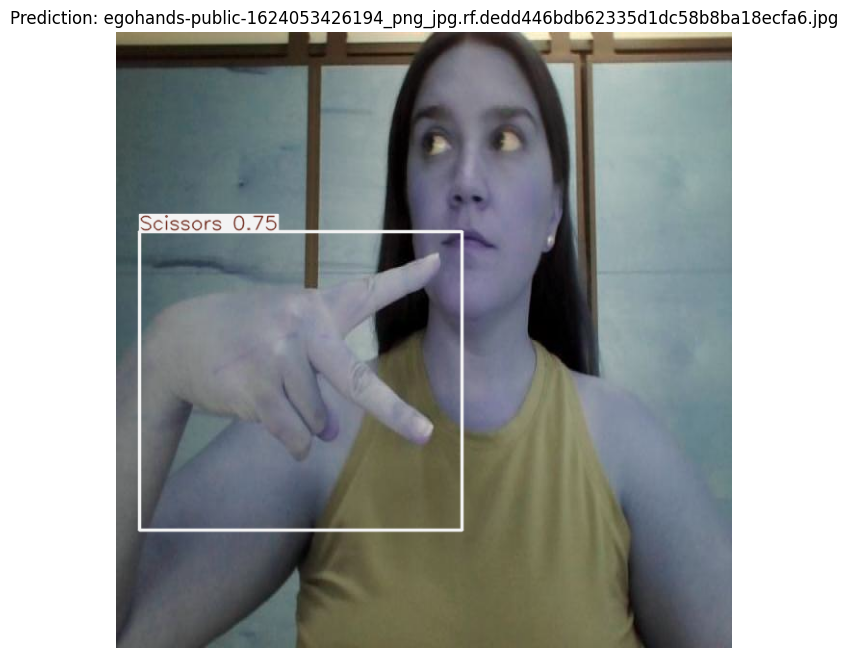


image 1/1 /content/rock_paper_scissors/test/images/egohands-public-1622127393755_png_jpg.rf.b2fd9abb11628423f5f82ffd4a5cadb1.jpg: 640x640 1 Paper, 1 Rock, 27.6ms
Speed: 5.1ms preprocess, 27.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


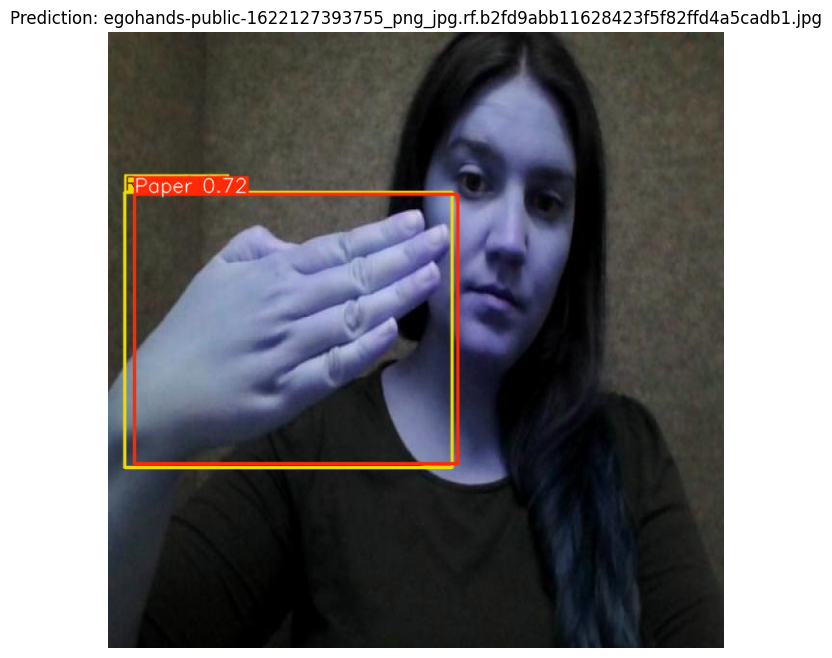


image 1/1 /content/rock_paper_scissors/test/images/egohands-public-1620849869759_png_jpg.rf.1297a5523b200f54839c058fbe6ec9ea.jpg: 640x640 1 Rock, 37.1ms
Speed: 2.2ms preprocess, 37.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


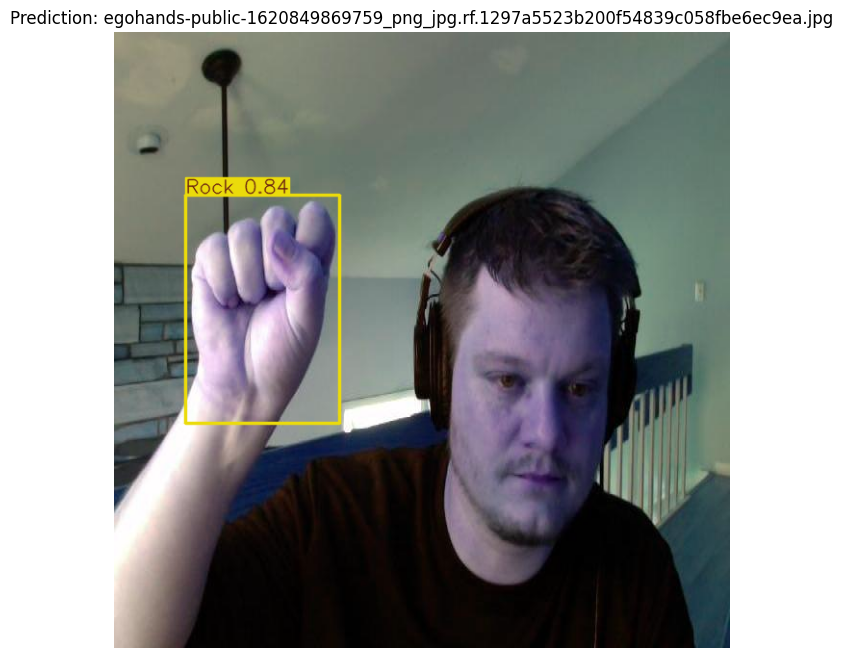

In [ ]:
TEST_PATH = '/content/rock_paper_scissors/test/images'
test_images = os.listdir(TEST_PATH)

# this will select 3 random images
sample_images = random.sample(test_images, 3)


for image_name in sample_images:
    img_path = os.path.join(TEST_PATH, image_name)


    results = model.predict(img_path)
    output_image = results[0].plot()

    # plotting the output :)
    plt.figure(figsize=(8, 8))
    plt.title(f"Prediction: {image_name}")
    plt.imshow(output_image)
    plt.axis("off")
    plt.show()


In [ ]:
import shutil

# Zip the 'runs' folder
shutil.make_archive("/content/runs", 'zip', "/content/runs")
print("Zipping completed: runs.zip")


Zipping completed: runs.zip


In [ ]:
from google.colab import files

# Download the zip file
files.download('/content/runs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>